In [ ]:
#Importing Image Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = {
             "train_data" : "/content/drive/MyDrive/Colab Notebooks/archive/train",
             "valid_data" : "/content/drive/MyDrive/Colab Notebooks/archive/valid",
             "test_data" : "/content/drive/MyDrive/Colab Notebooks/archive/test"
          }
import os
import pandas as pd

In [ ]:
#Image Preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1.0/255,rotation_range=30,width_shift_range=10.0,height_shift_range=10.0,shear_range=10,zoom_range=0.1,vertical_flip=True)
valid_datagen=ImageDataGenerator(rescale=1.0/255)
test_datagen=ImageDataGenerator(rescale=1.0/255)

train_ds=train_datagen.flow_from_directory(dataset['train_data'],target_size=(224,224),batch_size=10)
valid_ds=valid_datagen.flow_from_directory(dataset['valid_data'],target_size=(224,224),batch_size=10)
test_ds=test_datagen.flow_from_directory(dataset['test_data'],target_size=(224,224),batch_size=10)

Found 489 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [ ]:
#Model Building

import tensorflow as tf
model=tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(224,224,3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(48,activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(3,activation='softmax')
    ]
)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Model Fitting
model.fit(train_ds,validation_data=valid_ds,epochs=10,batch_size=20)

Epoch 1/10
49/49 [==============================] - 98s 2s/step - loss: 1.1085 - accuracy: 0.3558 - val_loss: 1.0994 - val_accuracy: 0.3333
Epoch 2/10
49/49 [==============================] - 10s 199ms/step - loss: 1.0794 - accuracy: 0.3783 - val_loss: 1.0246 - val_accuracy: 0.5333
Epoch 3/10
49/49 [==============================] - 8s 166ms/step - loss: 1.0281 - accuracy: 0.4744 - val_loss: 1.0041 - val_accuracy: 0.4667
Epoch 4/10
49/49 [==============================] - 10s 198ms/step - loss: 0.9933 - accuracy: 0.4806 - val_loss: 0.9989 - val_accuracy: 0.4667
Epoch 5/10
49/49 [==============================] - 9s 192ms/step - loss: 0.9725 - accuracy: 0.4867 - val_loss: 1.0082 - val_accuracy: 0.4667
Epoch 6/10
49/49 [==============================] - 8s 166ms/step - loss: 0.9528 - accuracy: 0.5358 - val_loss: 0.8921 - val_accuracy: 0.6000
Epoch 7/10
49/49 [==============================] - 10s 192ms/step - loss: 0.9182 - accuracy: 0.5685 - val_loss: 0.8850 - val_accuracy: 0.5333
Epoch

In [ ]:
# serialize model to JSON
#https://machinelearningmastery.com/save-load-keras-deep-learning-models/
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
from tensorflow.keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
#Model Prediction
model_out = model.predict(test_ds)

2/2 [==============================] - 2s 1s/step


In [ ]:
model_out

array([[0.22726856, 0.334141  , 0.43859044],
       [0.8157022 , 0.02670034, 0.15759748],
       [0.5424511 , 0.13320506, 0.32434386],
       [0.23566894, 0.3566334 , 0.40769768],
       [0.26725736, 0.32283399, 0.40990868],
       [0.2232392 , 0.34411746, 0.43264332],
       [0.64685607, 0.06980355, 0.28334036],
       [0.21712194, 0.3247841 , 0.45809388],
       [0.21883327, 0.38382342, 0.39734328],
       [0.79356354, 0.02211243, 0.18432403],
       [0.22504358, 0.31225663, 0.46269977],
       [0.8443679 , 0.01338789, 0.14224413],
       [0.47006494, 0.16507727, 0.3648577 ],
       [0.43990156, 0.15853858, 0.4015598 ],
       [0.1791932 , 0.411371  , 0.4094358 ]], dtype=float32)

In [ ]:
import numpy as np
y_pred_labels = np.argmax(model_out, axis=1)

In [ ]:
y_test_labels=test_ds.classes
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
#Model Validation
accuracy = accuracy_score(y_test_labels, y_pred_labels)
confusion_mat = confusion_matrix(y_test_labels, y_pred_labels)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.3333333333333333
Confusion Matrix:
[[0 0 5]
 [0 0 5]
 [0 0 5]]


In [ ]:
history=model.fit(train_ds,validation_data=valid_ds,epochs=10,batch_size=20)

Epoch 1/10
49/49 [==============================] - 12s 252ms/step - loss: 1.0884 - accuracy: 0.3865 - val_loss: 1.1091 - val_accuracy: 0.3333
Epoch 2/10
49/49 [==============================] - 12s 241ms/step - loss: 1.0868 - accuracy: 0.3885 - val_loss: 1.1114 - val_accuracy: 0.3333
Epoch 3/10
49/49 [==============================] - 8s 154ms/step - loss: 1.0869 - accuracy: 0.3906 - val_loss: 1.1111 - val_accuracy: 0.3333
Epoch 4/10
49/49 [==============================] - 9s 190ms/step - loss: 1.0893 - accuracy: 0.3906 - val_loss: 1.1083 - val_accuracy: 0.3333
Epoch 5/10
49/49 [==============================] - 9s 178ms/step - loss: 1.0866 - accuracy: 0.3906 - val_loss: 1.1086 - val_accuracy: 0.3333
Epoch 6/10
49/49 [==============================] - 8s 160ms/step - loss: 1.0869 - accuracy: 0.3906 - val_loss: 1.1106 - val_accuracy: 0.3333
Epoch 7/10
49/49 [==============================] - 9s 188ms/step - loss: 1.0863 - accuracy: 0.3906 - val_loss: 1.1099 - val_accuracy: 0.3333
Epoc

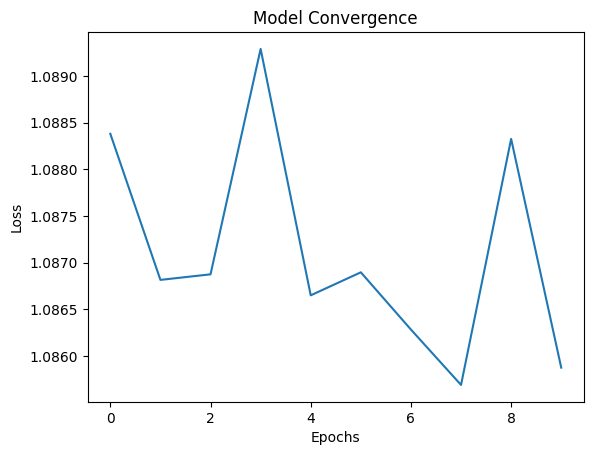

In [ ]:
#Data Visualisation of Model Accuracy
plt.plot(history.history['loss'])
plt.title('Model Convergence')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# dv in deep learning
# https://www.pluralsight.com/guides/data-visualization-deep-learning-model-using-matplotlib

In [ ]:
loaded_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
score = loaded_model.evaluate(test_ds, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 73.33%


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#hyper-parameter tunning
def customizable_model(train_data,valid_data,act='relu',drop_rate=0.3,epochs=20,l_rate=0.001):
  import tensorflow as tf
  model=tf.keras.models.Sequential(
      [
          tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(224,224,3)),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Conv2D(64,(3,3),activation=act),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Dropout(drop_rate),
          tf.keras.layers.Conv2D(32,(3,3),activation=act),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(64,activation=act),
          tf.keras.layers.Dropout(drop_rate),
          tf.keras.layers.Dense(48,activation=act),
          tf.keras.layers.Dropout(drop_rate),
          tf.keras.layers.Dense(32,activation=act),
          tf.keras.layers.Dropout(drop_rate),
          tf.keras.layers.Dense(3,activation='softmax')
      ]
  )
  model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=l_rate),loss='categorical_crossentropy',metrics=['accuracy'])
  history=model.fit(train_data,validation_data=valid_data,epochs=epochs,batch_size=20)
  return history

In [ ]:
import matplotlib.pyplot as plt

Epoch 1/20
49/49 [==============================] - 10s 153ms/step - loss: 1.1266 - accuracy: 0.3231 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 2/20
49/49 [==============================] - 9s 185ms/step - loss: 1.0918 - accuracy: 0.3926 - val_loss: 1.0859 - val_accuracy: 0.3333
Epoch 3/20
49/49 [==============================] - 9s 186ms/step - loss: 1.0590 - accuracy: 0.4049 - val_loss: 1.0133 - val_accuracy: 0.4000
Epoch 4/20
49/49 [==============================] - 8s 153ms/step - loss: 1.0043 - accuracy: 0.4785 - val_loss: 1.0309 - val_accuracy: 0.5333
Epoch 5/20
49/49 [==============================] - 9s 184ms/step - loss: 1.0541 - accuracy: 0.4519 - val_loss: 1.0234 - val_accuracy: 0.4667
Epoch 6/20
49/49 [==============================] - 8s 168ms/step - loss: 0.9998 - accuracy: 0.5112 - val_loss: 1.0395 - val_accuracy: 0.4000
Epoch 7/20
49/49 [==============================] - 9s 182ms/step - loss: 0.9988 - accuracy: 0.5133 - val_loss: 0.9920 - val_accuracy: 0.4000
Epoch

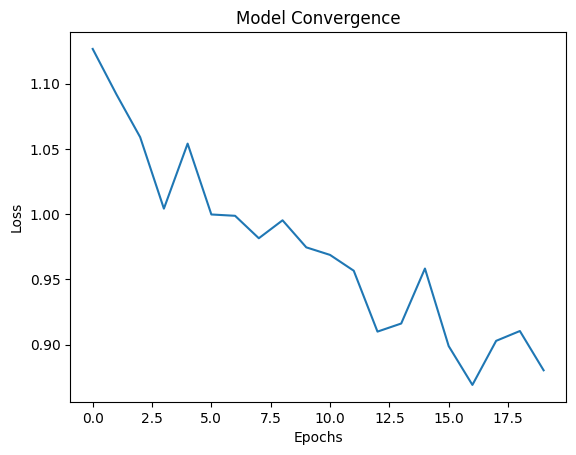

Epoch 1/20
49/49 [==============================] - 12s 185ms/step - loss: 1.3120 - accuracy: 0.3599 - val_loss: 1.1092 - val_accuracy: 0.3333
Epoch 2/20
49/49 [==============================] - 8s 152ms/step - loss: 1.0886 - accuracy: 0.3885 - val_loss: 1.1098 - val_accuracy: 0.3333
Epoch 3/20
49/49 [==============================] - 9s 190ms/step - loss: 1.0895 - accuracy: 0.3906 - val_loss: 1.1105 - val_accuracy: 0.3333
Epoch 4/20
49/49 [==============================] - 8s 164ms/step - loss: 1.0861 - accuracy: 0.3926 - val_loss: 1.1108 - val_accuracy: 0.3333
Epoch 5/20
49/49 [==============================] - 7s 149ms/step - loss: 1.0885 - accuracy: 0.3824 - val_loss: 1.1110 - val_accuracy: 0.3333
Epoch 6/20
49/49 [==============================] - 9s 184ms/step - loss: 1.0878 - accuracy: 0.3906 - val_loss: 1.1104 - val_accuracy: 0.3333
Epoch 7/20
49/49 [==============================] - 7s 151ms/step - loss: 1.0877 - accuracy: 0.3906 - val_loss: 1.1113 - val_accuracy: 0.3333
Epoch

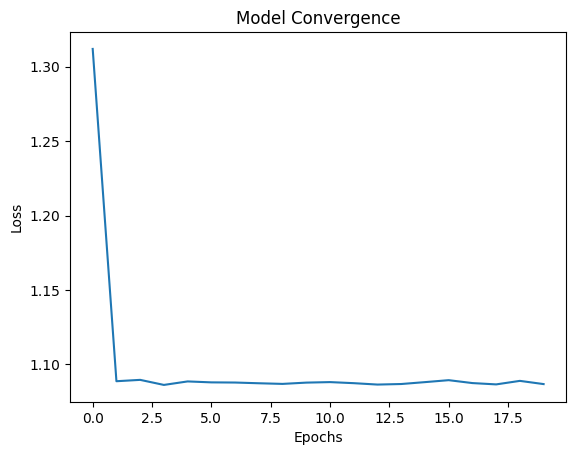

Epoch 1/20
49/49 [==============================] - 12s 193ms/step - loss: 1.6345 - accuracy: 0.3661 - val_loss: 1.1126 - val_accuracy: 0.3333
Epoch 2/20
49/49 [==============================] - 9s 175ms/step - loss: 1.0903 - accuracy: 0.3681 - val_loss: 1.1076 - val_accuracy: 0.3333
Epoch 3/20
49/49 [==============================] - 7s 149ms/step - loss: 1.0895 - accuracy: 0.3906 - val_loss: 1.1136 - val_accuracy: 0.3333
Epoch 4/20
49/49 [==============================] - 9s 187ms/step - loss: 1.0904 - accuracy: 0.3824 - val_loss: 1.1082 - val_accuracy: 0.3333
Epoch 5/20
49/49 [==============================] - 9s 188ms/step - loss: 1.0882 - accuracy: 0.3885 - val_loss: 1.1108 - val_accuracy: 0.3333
Epoch 6/20
49/49 [==============================] - 8s 153ms/step - loss: 1.0877 - accuracy: 0.3906 - val_loss: 1.1181 - val_accuracy: 0.3333
Epoch 7/20
49/49 [==============================] - 8s 158ms/step - loss: 1.0870 - accuracy: 0.3906 - val_loss: 1.1122 - val_accuracy: 0.3333
Epoch

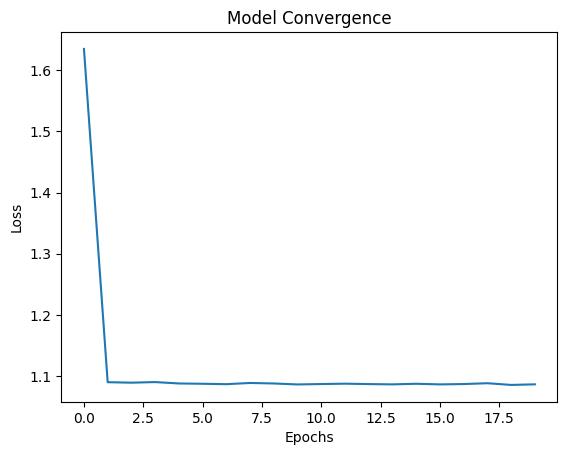

Epoch 1/20
49/49 [==============================] - 12s 157ms/step - loss: 530.8854 - accuracy: 0.3783 - val_loss: 1.1373 - val_accuracy: 0.3333
Epoch 2/20
49/49 [==============================] - 9s 193ms/step - loss: 1.1020 - accuracy: 0.3824 - val_loss: 1.1141 - val_accuracy: 0.3333
Epoch 3/20
49/49 [==============================] - 9s 173ms/step - loss: 1.0918 - accuracy: 0.3804 - val_loss: 1.1062 - val_accuracy: 0.3333
Epoch 4/20
49/49 [==============================] - 8s 158ms/step - loss: 1.0890 - accuracy: 0.3681 - val_loss: 1.1371 - val_accuracy: 0.3333
Epoch 5/20
49/49 [==============================] - 10s 194ms/step - loss: 1.0972 - accuracy: 0.3722 - val_loss: 1.1067 - val_accuracy: 0.3333
Epoch 6/20
49/49 [==============================] - 8s 165ms/step - loss: 1.0907 - accuracy: 0.3906 - val_loss: 1.1013 - val_accuracy: 0.3333
Epoch 7/20
49/49 [==============================] - 9s 183ms/step - loss: 1.0872 - accuracy: 0.3845 - val_loss: 1.1425 - val_accuracy: 0.3333
Ep

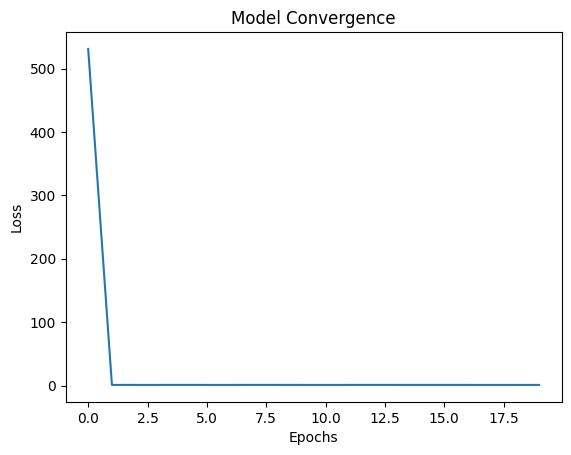

Epoch 1/20
49/49 [==============================] - 11s 170ms/step - loss: 37816.5547 - accuracy: 0.3906 - val_loss: 1.1423 - val_accuracy: 0.3333
Epoch 2/20
49/49 [==============================] - 9s 173ms/step - loss: 1.0998 - accuracy: 0.3681 - val_loss: 1.1084 - val_accuracy: 0.3333
Epoch 3/20
49/49 [==============================] - 9s 193ms/step - loss: 1.0990 - accuracy: 0.3599 - val_loss: 1.1298 - val_accuracy: 0.3333
Epoch 4/20
49/49 [==============================] - 8s 157ms/step - loss: 1.1052 - accuracy: 0.3845 - val_loss: 1.1372 - val_accuracy: 0.3333
Epoch 5/20
49/49 [==============================] - 8s 170ms/step - loss: 1.0951 - accuracy: 0.3620 - val_loss: 1.1195 - val_accuracy: 0.3333
Epoch 6/20
49/49 [==============================] - 9s 193ms/step - loss: 1.0964 - accuracy: 0.3804 - val_loss: 1.1248 - val_accuracy: 0.3333
Epoch 7/20
49/49 [==============================] - 8s 160ms/step - loss: 1.0991 - accuracy: 0.3681 - val_loss: 1.1175 - val_accuracy: 0.3333
E

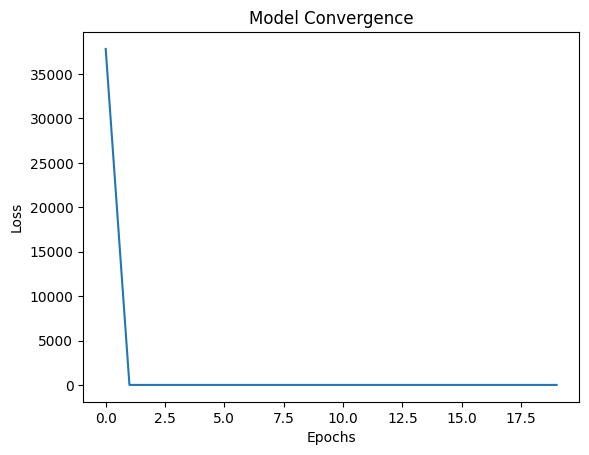

Epoch 1/20
49/49 [==============================] - 11s 165ms/step - loss: 39730597888.0000 - accuracy: 0.3354 - val_loss: 2.2487 - val_accuracy: 0.3333
Epoch 2/20
49/49 [==============================] - 9s 178ms/step - loss: 1324602.2500 - accuracy: 0.3824 - val_loss: 1.3596 - val_accuracy: 0.3333
Epoch 3/20
49/49 [==============================] - 10s 195ms/step - loss: 1.9401 - accuracy: 0.3620 - val_loss: 1.2090 - val_accuracy: 0.3333
Epoch 4/20
49/49 [==============================] - 8s 158ms/step - loss: 1.4172 - accuracy: 0.3558 - val_loss: 1.2265 - val_accuracy: 0.3333
Epoch 5/20
49/49 [==============================] - 9s 189ms/step - loss: 1.1550 - accuracy: 0.3885 - val_loss: 1.3279 - val_accuracy: 0.3333
Epoch 6/20
49/49 [==============================] - 9s 190ms/step - loss: 1.1564 - accuracy: 0.3640 - val_loss: 1.3946 - val_accuracy: 0.3333
Epoch 7/20
49/49 [==============================] - 7s 150ms/step - loss: 1.1717 - accuracy: 0.3763 - val_loss: 1.1336 - val_accur

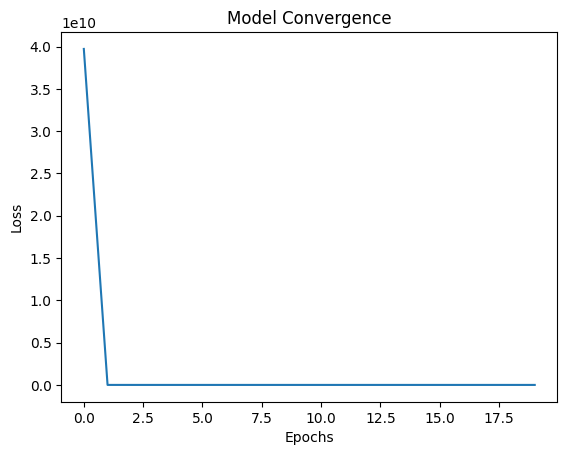

Epoch 1/20
49/49 [==============================] - 12s 172ms/step - loss: 3.3589 - accuracy: 0.3436 - val_loss: 1.1082 - val_accuracy: 0.3333
Epoch 2/20
49/49 [==============================] - 9s 190ms/step - loss: 1.0918 - accuracy: 0.3865 - val_loss: 1.1052 - val_accuracy: 0.3333
Epoch 3/20
49/49 [==============================] - 7s 150ms/step - loss: 1.0903 - accuracy: 0.3906 - val_loss: 1.1092 - val_accuracy: 0.3333
Epoch 4/20
49/49 [==============================] - 8s 171ms/step - loss: 1.0880 - accuracy: 0.3906 - val_loss: 1.1082 - val_accuracy: 0.3333
Epoch 5/20
49/49 [==============================] - 9s 183ms/step - loss: 1.0855 - accuracy: 0.3906 - val_loss: 1.1152 - val_accuracy: 0.3333
Epoch 6/20
49/49 [==============================] - 7s 151ms/step - loss: 1.0878 - accuracy: 0.3926 - val_loss: 1.1046 - val_accuracy: 0.3333
Epoch 7/20
49/49 [==============================] - 9s 183ms/step - loss: 1.0899 - accuracy: 0.3906 - val_loss: 1.1156 - val_accuracy: 0.3333
Epoch

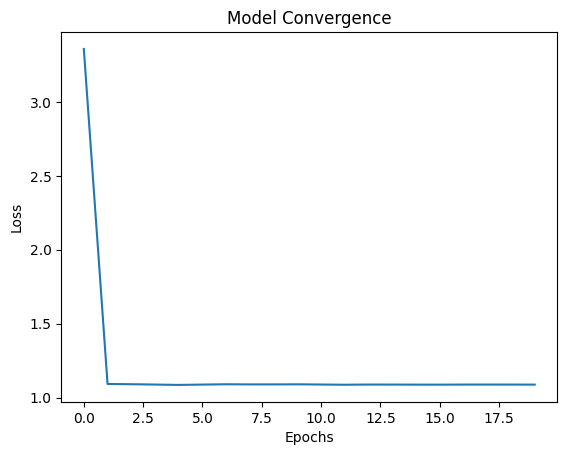

In [ ]:
l_rate=[0.001,0.005,0.01,0.05,0.1,0.9,0.009]
for i in l_rate:
  u=customizable_model(train_ds,valid_ds,l_rate=i)
  plt.plot(u.history['loss'])
  plt.title('Model Convergence')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

In [ ]:
# https://www.gradio.app/docs/interface

Epoch 1/20
49/49 [==============================] - 11s 155ms/step - loss: 1.0765 - accuracy: 0.3742 - val_loss: 1.0193 - val_accuracy: 0.4000
Epoch 2/20
49/49 [==============================] - 9s 188ms/step - loss: 0.9653 - accuracy: 0.5072 - val_loss: 0.9987 - val_accuracy: 0.4000
Epoch 3/20
49/49 [==============================] - 8s 160ms/step - loss: 0.8863 - accuracy: 0.5828 - val_loss: 0.9767 - val_accuracy: 0.5333
Epoch 4/20
49/49 [==============================] - 9s 178ms/step - loss: 0.8554 - accuracy: 0.6278 - val_loss: 1.0756 - val_accuracy: 0.6000
Epoch 5/20
49/49 [==============================] - 10s 204ms/step - loss: 0.8605 - accuracy: 0.6176 - val_loss: 0.9513 - val_accuracy: 0.5333
Epoch 6/20
49/49 [==============================] - 8s 153ms/step - loss: 0.8327 - accuracy: 0.6196 - val_loss: 1.0492 - val_accuracy: 0.5333
Epoch 7/20
49/49 [==============================] - 9s 183ms/step - loss: 0.7862 - accuracy: 0.6360 - val_loss: 1.0695 - val_accuracy: 0.6000
Epoc

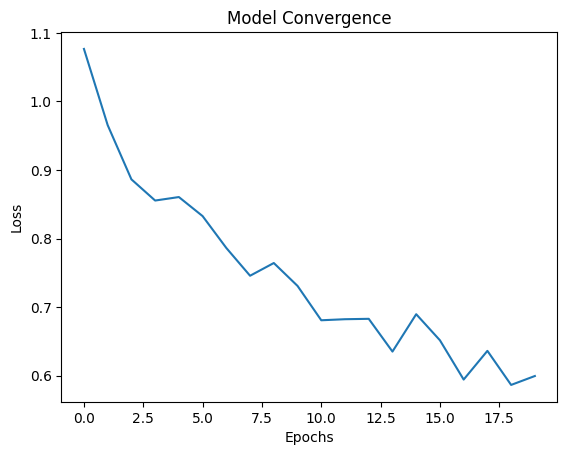

Epoch 1/20
49/49 [==============================] - 12s 172ms/step - loss: 1.0451 - accuracy: 0.4315 - val_loss: 0.9571 - val_accuracy: 0.4000
Epoch 2/20
49/49 [==============================] - 9s 189ms/step - loss: 0.9835 - accuracy: 0.4990 - val_loss: 1.1027 - val_accuracy: 0.5333
Epoch 3/20
49/49 [==============================] - 8s 153ms/step - loss: 0.8956 - accuracy: 0.5317 - val_loss: 0.8946 - val_accuracy: 0.5333
Epoch 4/20
49/49 [==============================] - 9s 171ms/step - loss: 0.8713 - accuracy: 0.6094 - val_loss: 1.0671 - val_accuracy: 0.6000
Epoch 5/20
49/49 [==============================] - 9s 185ms/step - loss: 0.8419 - accuracy: 0.6196 - val_loss: 0.9640 - val_accuracy: 0.5333
Epoch 6/20
49/49 [==============================] - 8s 152ms/step - loss: 0.7923 - accuracy: 0.6442 - val_loss: 0.9293 - val_accuracy: 0.6667
Epoch 7/20
49/49 [==============================] - 9s 183ms/step - loss: 0.7473 - accuracy: 0.6524 - val_loss: 0.9344 - val_accuracy: 0.6000
Epoch

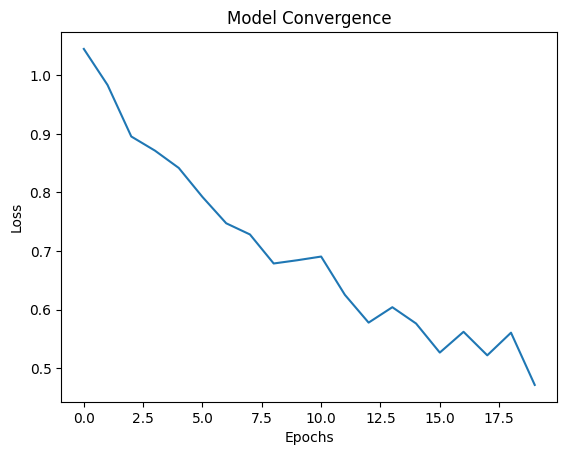

Epoch 1/20
49/49 [==============================] - 11s 152ms/step - loss: 1.0396 - accuracy: 0.4233 - val_loss: 0.8687 - val_accuracy: 0.5333
Epoch 2/20
49/49 [==============================] - 9s 186ms/step - loss: 0.9129 - accuracy: 0.5501 - val_loss: 0.9283 - val_accuracy: 0.4667
Epoch 3/20
49/49 [==============================] - 8s 170ms/step - loss: 0.8800 - accuracy: 0.5849 - val_loss: 1.2079 - val_accuracy: 0.4667
Epoch 4/20
49/49 [==============================] - 8s 169ms/step - loss: 0.9234 - accuracy: 0.5521 - val_loss: 1.0368 - val_accuracy: 0.4000
Epoch 5/20
49/49 [==============================] - 9s 187ms/step - loss: 0.8923 - accuracy: 0.5746 - val_loss: 1.1474 - val_accuracy: 0.5333
Epoch 6/20
49/49 [==============================] - 8s 152ms/step - loss: 0.8319 - accuracy: 0.5992 - val_loss: 1.0335 - val_accuracy: 0.6000
Epoch 7/20
49/49 [==============================] - 9s 185ms/step - loss: 0.7880 - accuracy: 0.6585 - val_loss: 1.0204 - val_accuracy: 0.4667
Epoch

KeyboardInterrupt: ignored

In [ ]:
drop_rate=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in l_rate:
  u=customizable_model(train_ds,valid_ds,drop_rate=i)
  plt.plot(u.history['loss'])
  plt.title('Model Convergence')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

In [ ]:
#gradio app interface
!pip install gradio
import gradio as gr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 9.2 MB/s eta 0

In [ ]:
image=gr.inputs.Image(shape=(224,224,3))

def image_classification(input):
  input=input.reshape((224,224,3))
  model_out = model.predict(input)
  y_pred_labels = np.argmax(model_out)
  games=['BasketBall','Cricket','FootBall']
  return(f'The Predicted Output is {games[y_pred_labels ]} with accuracy of {model_out[y_pred_labels ]}')
gr.Interface(fn=image_classification,inputs=image,outputs='text',capture_session=True).launch()

<ipython-input-9-59666d6a004e>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image=gr.inputs.Image(shape=(224,224,3))
<ipython-input-9-59666d6a004e>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image=gr.inputs.Image(shape=(224,224,3))
<ipython-input-9-59666d6a004e>:9: GradioDeprecationWarning: `capture_session` parameter is deprecated, and it has no effect
  gr.Interface(fn=image_classification,inputs=image,outputs='text',capture_session=True).launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>